In [1]:
import numpy as np
import pandas as pd

In [2]:
import os

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [4]:
plt.style.use('dark_background')

In [5]:
from gadget_tools import Snapshot, read_positions_all_files

In [52]:
# snap = Snapshot('/scratch/cprem/sims/my-bdm_cdm256_p18/r1/ics_gadget.dat')
snap = Snapshot('/scratch/cprem/sims/my-bdm_cdm256_p18/r2/snapshot_023')

In [53]:
vars(snap)

{'h5py': <module 'h5py' from '/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/site-packages/h5py/__init__.py'>,
 'filename': '/scratch/cprem/sims/my-bdm_cdm256_p18/r2/snapshot_023.hdf5',
 'filetype': 'gadget_hdf5',
 'N_prtcl_thisfile': array([       0, 16777216,        0,        0,        0,        0],
       dtype=uint32),
 'mass_table': array([0.        , 4.05381691, 0.        , 0.        , 0.        ,
        0.        ]),
 'scale_factor': 0.289026391002245,
 'redshift': 2.459891660869933,
 'N_prtcl_total': array([       0, 16777216,        0,        0,        0,        0],
       dtype=uint64),
 'num_files': 1,
 'box_size': 200.0,
 'Omega_m_0': 0.3063375,
 'Omega_Lam_0': 0.6936625,
 'Hubble_param': 0.6781,
 'num_part_types': 6.0,
 'params': <Attributes of HDF5 object at 47099722508224>}

In [54]:
0.063*8

0.504

In [55]:
2**27

134217728

In [56]:
# np.vstack([np.zeros((3,2)),])

In [57]:
# posd = read_positions_all_files('/scratch/cprem/sims/my-bdm_cdm512_p18/r1/ics_gadget.dat')/snapdir_018/

In [60]:
posd = read_positions_all_files('/scratch/cprem/sims/my-bdm_cdm256_p18/r2/snapshot_023')

/scratch/cprem/sims/my-bdm_cdm256_p18/r2/snapshot_023.hdf5
Instantiated a snapshot object, use 'from_binary' method to read from binary.


In [61]:
# from pm_tools import assign_density

In [62]:
from pm_tools import assign_density, project_to_slice

In [63]:
dens = assign_density(posd, snap.box_size)+1

In [64]:
# dens+1

In [65]:
# logdens = np.log10(dens+1e-2)

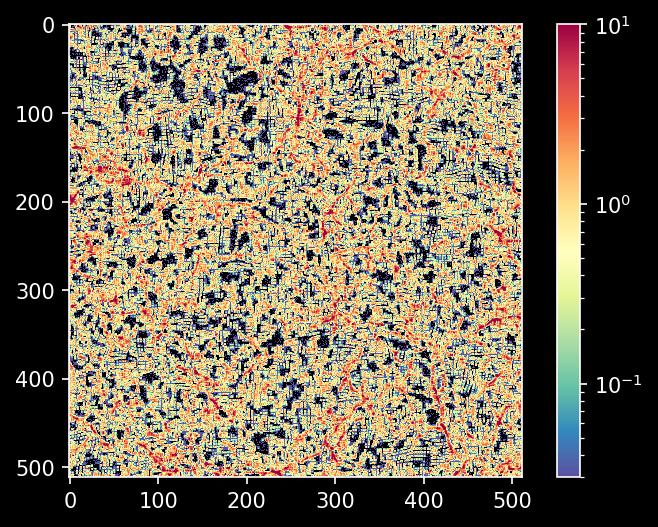

In [66]:
fig, ax = plt.subplots(1, dpi=150)
im = ax.imshow(dens[250],cmap='Spectral_r',norm = LogNorm(vmin=3e-2, vmax=1e1))
cb = plt.colorbar(im, ax=ax)

In [39]:
input_power_spec = pd.read_csv('/scratch/cprem/sims/my-bdm_cdm256_p18/input_powerspec.txt', sep='\s+', comment='#', usecols=[0,1], names=['k','pk'])

In [67]:
power_spec_folding = pd.read_csv('/scratch/cprem/sims/my-bdm_cdm256_p18/r2/powerspecs/powerspec_023.txt', sep='\s+', usecols=[0,1], names=['k', 'Delk'], skiprows=5)

In [68]:
# power_spec['pk'] = power_spec['Delk']*power_spec['k']**-3*2*np.pi**2

In [69]:
power_spec_folding

,k,Delk
0,3.141590e-02,4.029690e-03
1,4.442880e-02,7.847410e-03
2,5.441400e-02,1.250620e-02
3,6.283190e-02,1.669900e-02
4,7.024810e-02,2.316190e-02
...,...,...
4004,2.050340e+03,2.859350e+08
4005,2.056020e+03,2.897250e+08
4006,6.801180e+07,NaN
4007,1.677720e+07,NaN


In [70]:
input_power_spec

,k,pk
0,0.000100,2.885288e-04
1,0.000101,2.913191e-04
2,0.000102,2.941362e-04
3,0.000103,2.969806e-04
4,0.000104,2.998525e-04
...,...,...
1422,139.634752,1.183477e-10
1423,141.031100,1.151090e-10
1424,142.441411,1.119579e-10
1425,143.865825,1.088921e-10


In [71]:
# power_spec['pk']*power_spec['k']**-3*2*np.pi**2

In [72]:
power_spec_folding.sort_values('k', inplace=True)

In [73]:
power_spec_folding = power_spec_folding[power_spec_folding['k'].between(1e-3,1e2)]

In [74]:
power_spec_folding['k'].between(1e-3,1e1)

0        True
1        True
2        True
3        True
4        True
        ...  
2508    False
2934    False
2509    False
2935    False
2510    False
Name: k, Length: 2640, dtype: bool

In [75]:
power_spec_folding_grouped1 = power_spec_folding.groupby(pd.cut(power_spec_folding['k'], bins=100)).mean()
power_spec_folding_grouped1['pk'] = power_spec_folding_grouped1['Delk']*power_spec_folding_grouped1['k']**-3*2*np.pi**2

In [76]:
power_spec_existing = pd.read_csv('/scratch/aseem/sims/bdm_cdm1024/r1/Pk_200.txt', comment='#', sep='\t',names=['k','pk','ph','pcross'])

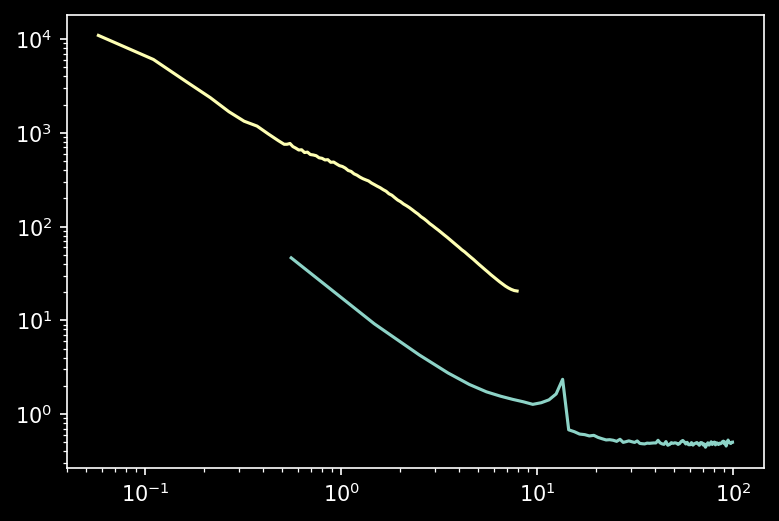

In [77]:
# power_spec_grouped1.plot('k', 'pk', marker='o', markersize=1)
plt.figure(dpi=150)
plt.plot(power_spec_folding_grouped1['k'], power_spec_folding_grouped1['pk'])
plt.plot(power_spec_existing['k'], power_spec_existing['pk'])
# power_spec_existing.groupby('k').mean().reset_index().plot('k','pk', loglog=True, ax=ax2, color=lighter(color), linestyle='dashed', label='', legend=False)
plt.xscale('log')
plt.yscale('log')
# plt.xlim(right=1e2)
# plt.ylim(bottom=1e-5)

In [150]:
1/13

0.07692307692307693

In [153]:
(1-1/13)/200

0.004615384615384616

In [154]:
import os

True

In [54]:
(10)**(1/10)

1.2589254117941673

In [8]:
0.07692307692307693*1.012907336538952**200

0.9999999999999842

In [6]:
z_list = []

In [11]:
z_list = []
for i in range(0,51):
    snap = Snapshot(f'/scratch/cprem/sims/my-bdm_cdm512_p18/r2/snapdir_{i:03d}/snapshot_{i:03d}.0')
    z_list.append(snap.redshift)
    
    

In [12]:
z = np.array(z_list)

In [13]:
a = 1/(1+z)

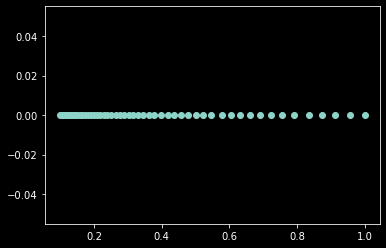

In [14]:
plt.scatter(a, a*0)

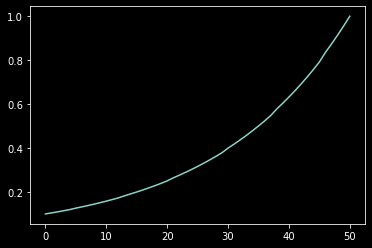

In [15]:
plt.plot(a)

In [16]:
a[1:]/a[:-1]

array([1.04599895, 1.04599895, 1.04599895, 1.04599895, 1.0554496 ,
       1.04599895, 1.04599895, 1.04599895, 1.04599895, 1.04599895,
       1.04599895, 1.04599895, 1.0554496 , 1.04599895, 1.04599895,
       1.04599895, 1.04599895, 1.04599895, 1.04599895, 1.04599895,
       1.0554496 , 1.04599895, 1.04599895, 1.04599895, 1.04599895,
       1.04599895, 1.04599895, 1.04599895, 1.04599895, 1.0554496 ,
       1.04599895, 1.04599895, 1.04599895, 1.04599895, 1.04599895,
       1.04599895, 1.04599895, 1.0554496 , 1.04599895, 1.04599895,
       1.04599895, 1.04599895, 1.04599895, 1.04599895, 1.04599895,
       1.0554496 , 1.04599895, 1.04599895, 1.04599895, 1.04599895])

In [17]:
1/10

0.1

In [18]:
a

array([0.1       , 0.1045999 , 0.10941138, 0.11444419, 0.1197085 ,
       0.12634629, 0.13215809, 0.13823722, 0.14459599, 0.15124725,
       0.15820447, 0.16548171, 0.1730937 , 0.18269167, 0.1910953 ,
       0.19988548, 0.20908   , 0.21869747, 0.22875732, 0.23927992,
       0.25028654, 0.26416483, 0.27631614, 0.28902639, 0.3023213 ,
       0.31622777, 0.33077391, 0.34598917, 0.36190431, 0.37855152,
       0.39954206, 0.41792057, 0.43714448, 0.45725267, 0.47828581,
       0.50028646, 0.52329911, 0.54737033, 0.57772179, 0.60429639,
       0.63209339, 0.66116903, 0.69158211, 0.72339416, 0.75666954,
       0.79147554, 0.83536255, 0.87378835, 0.9139817 , 0.9560239 ,
       1.        ])

In [124]:
1.07460783**32

10.000000499883193

In [109]:
1.33**.5

1.1532562594670797

In [110]:
1.15478198**21

20.535248513346513

In [111]:
1/20

0.05

In [112]:
np.log(1.15478198)

0.14391156425122445

In [115]:
np.log(1.07460783)

0.07195578571819887

In [125]:
1.04712854805**50

9.999999999570527